<a href="https://colab.research.google.com/github/salmanromeo/shafi/blob/master/1D_Pitching_Moment_Euler_RK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Euler and Runge Kutta (RK4) solution of 1D Pitching Moment Equation**

The following 1D Pitching Moment Equation for Blunt-Body Entry Vehicles is a second order ODE.
\begin{align}
      \ddot{α} - \frac{ρVSd^2} {4I} ({C}_{m_q} + {C}_{m_\dot{α}})\dot{α}-\frac{ρV^2Sd} {2I} {C}_{m_{α}}{α}=0
    \end{align}
Or, we can write as follow:
\begin{align}
  \dfrac{\mathrm{d^2}{α}}{\mathrm{d}t} - \frac{ρVSd^2} {4I} ({C}_{m_q} + {C}_{m_\dot{α}})\dfrac{\mathrm{d}{α}}{\mathrm{d}t}-\frac{ρV^2Sd} {2I} {C}_{m_{α}}{α}=0
    \end{align}
Or,
\begin{align}
  \dfrac{\mathrm{d^2}{α}}{\mathrm{d}t} - m\dfrac{\mathrm{d}{α}}{\mathrm{d}t}-k{α}=0
    \end{align}
Where
\begin{align}
  m = \frac{ρVSd^2} {4I} ({C}_{m_q} + {C}_{m_\dot{α}})
    \end{align}
And
\begin{align}
  k = \frac{ρV^2Sd} {2I} {C}_{m_{α}}
    \end{align}

Let’s reduce the second-order differential equation into two first-order equations as follow:
\begin{align}
  \dfrac{\mathrm{d}{α}}{\mathrm{d}t} = u(t) = α_1(t)
    \end{align}
\begin{align}
  \dfrac{\mathrm{d^2}{α}}{\mathrm{d}t} = \dfrac{\mathrm{d}{u(t)}}{\mathrm{d}t} = α_2(t)
    \end{align}

So, we can write,
\begin{align}
\dfrac{\mathrm{d}{u(t)}}{\mathrm{d}t} = m*u(t) + k*α(t)
    \end{align}
Or,
\begin{align}
\dfrac{\mathrm{d}{u(t)}}{\mathrm{d}t} = \frac{ρVSd^2} {4I} ({C}_{m_q} + {C}_{m_\dot{α}})*u(t) + \frac{ρV^2Sd} {2I} {C}_{m_{α}}*α(t)
    \end{align}
Or,
\begin{align}
α_2(t) = \frac{ρVSd^2} {4I} ({C}_{m_q} + {C}_{m_\dot{α}})*u(t) + \frac{ρV^2Sd} {2I} {C}_{m_{α}}*α(t)
    \end{align}

Therefore,
\begin{align}
   \begin{bmatrix}
           α_1(t)\\
           α_2(t)
    \end{bmatrix} = \begin{bmatrix}
           \dfrac{\mathrm{d}{α(t)}}{\mathrm{d}t}\\
           \frac{ρVSd^2} {4I} ({C}_{m_q} + {C}_{m_\dot{α}})*u(t) + \frac{ρV^2Sd} {2I} {C}_{m_{α}}*α(t)
    \end{bmatrix}
    \end{align}
Or,
\begin{align}
   \begin{bmatrix}
           α_1(t)\\
           α_2(t)
    \end{bmatrix} = \begin{bmatrix}
           \dfrac{\mathrm{d}{α(t)}}{\mathrm{d}t}\\
           \frac{ρVSd^2} {4I} ({C}_{m_q} + {C}_{m_\dot{α}})\dfrac{\mathrm{d}{α(t)}}{\mathrm{d}t} + \frac{ρV^2Sd} {2I} {C}_{m_{α}}α(t)
    \end{bmatrix}
    \end{align}

Now, we can solve it by Euler or RK4.

**Environment**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

**The exact solution**

In [11]:
def exact(A, ro, v, s, d, CM_q_a, CM_a, I, dlt, t_e):
    # analytical solution
    w = np.sqrt(-((ro*v**2*s*d*CM_a)/(2*I)))    # w is omega
    co = np.cos(w*t_e + dlt)
    e = (ro*v*s*d**2)*(CM_q_a)/(8*I)            # e is epsilon
    exp = np.exp(e*t_e)
    y  = A*exp*co                               # y is alpha
    return y

**Assign parameters**

In [12]:
A       = 1
ro      = 1.20
v       = 858
s       = 0.00385
d       = 0.07
CM_q_a  = 0
CM_a    = -0.09
I       = 1.55e-4
dlt     = 0

**Get exact solution**

In [13]:
t_e = np.linspace(0,0.3,300)
exact_sol = exact(A, ro, v, s, d, CM_q_a, CM_a, I, dlt, t_e)

**Numerical Methods**

In [14]:
# initialization
t    = 0.0
u    = 0.0
alpha= 1.0
tf   = 0.3     # final value of t
dt   = 0.001   # step length
tt   = []
uu   = []
aa   = []

**Defining functions**

In [15]:
# 1st ODE
def f1(alpha,u,t):
    return u              # d_alpha/dt=u ..> f1(alpha,u,t)
# 2nd ODE
def f2(alpha,u,t):
    ro      = 1.20
    v       = 858
    s       = 0.00385
    d       = 0.07
    CM_q_a  = 0
    CM_a    = -0.09
    I       = 1.55e-4
    return (ro*v*s*d**2)*(CM_q_a)/(4*I)*u + (ro*v**2*s*d*CM_a)/(2*I)*alpha  # du/dt=alpha2 ..> f2(alpha,u,t)

**Iteration**

**Euler Method**

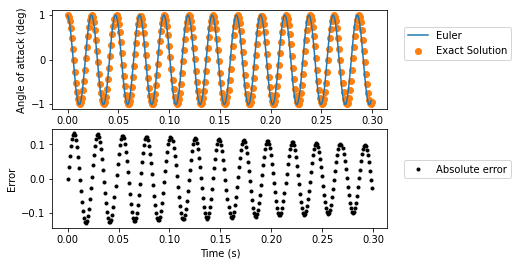

In [8]:
# Euler Solution
while t<=tf:
    tt.append(t)
    uu.append(u)
    aa.append(alpha)
    u+=dt*f2(alpha,u,t)
    alpha+=dt*f1(alpha,u,t)  
    t+=dt

plt.subplot(2,1,1)
plt.plot(tt,aa,label="Euler")
plt.scatter(t_e,exact_sol,color="tab:orange",label="Exact Solution")
plt.xlabel("Time (s)")
plt.ylabel("Angle of attack (deg)")
plt.legend(loc=(1.05,0.5))

# Calculation of Error and plotting
diff = exact_sol - aa
plt.subplot(2,1,2)
plt.plot(tt,diff,'k.',label="Absolute error")
plt.xlabel("Time (s)")
plt.ylabel("Error")
plt.legend(loc=(1.05,0.5))

**Fourth order Runge Kutta (RK4)**

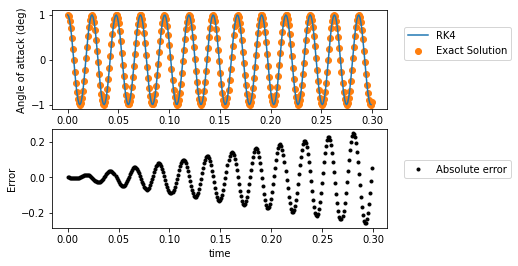

In [18]:
# RK4
while t<=tf:
    tt.append(t)
    uu.append(u)
    aa.append(alpha)
    p1=dt*f1(alpha,u,t) # dq at initial point
    p2=dt*f2(alpha,u,t) # di at initial point
    q1=dt*f1(alpha+0.5*p1,u+0.5*p2,t+0.5*dt)
    q2=dt*f2(alpha+0.5*p1,u+0.5*p2,t+0.5*dt)
    r1=dt*f1(alpha+0.5*q1,u+0.5*q2,t+0.5*dt)
    r2=dt*f2(alpha+0.5*q1,u+0.5*q2,t+0.5*dt)
    s1=dt*f1(alpha+r1,u+r2,t+dt)
    s2=dt*f2(alpha+r1,u+r2,t+dt)
    u+=(p2+2*q2+2*r2+s2)/6.0
    alpha+=(p1+2*q1+2*r1+s1)/6.0
    t+=dt

plt.subplot(2,1,1)
plt.plot(tt,aa,label="RK4")
plt.scatter(t_e,exact_sol,color="tab:orange",label="Exact Solution")
plt.xlabel("Time (s)")
plt.ylabel("Angle of attack (deg)")
plt.legend(loc=(1.05,0.5))

# Calculation of Error and plotting
diff = exact_sol - aa
plt.subplot(2,1,2)
plt.plot(tt,diff,'k.',label="Absolute error")
plt.xlabel("time")
plt.ylabel("Error")
plt.legend(loc=(1.05,0.5))